In [5]:
%%capture

!pip install numpy
!pip install pybamm
!pip install scikit-learn
!pip install fastsim

# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import glob
import os
import math
#import fastsim
#import pybamm

## EDA

In [6]:
# Define the path to a single .txt file
file_path = "US06_HS_TEST/61302100 Test Data.txt"

# Read the single .txt file into a DataFrame
df = pd.read_csv(file_path, sep="\t")

# Extract the "Test_id" from the filename
test_id = int(os.path.basename(file_path).split()[0])

# Add the "Test_id" column to the DataFrame
df["Test_id"] = test_id

# Reorder the columns to place "Test_id" at the beginning
columns = ["Test_id"] + [col for col in df.columns if col != "Test_id"]
df = df[columns]

In [7]:
df.head(5)

Test_id  Time[sec]  Dyno_Speed[mph]  Dyno_Tractive_Effort[N]  \
0  61302100      -10.0           -0.001                   -2.955   
1  61302100       -9.9           -0.000                   -3.063   
2  61302100       -9.8           -0.002                   -3.063   
3  61302100       -9.7           -0.000                   -3.041   
4  61302100       -9.6           -0.001                   -2.998   

   Test_Cell_RH[%]  Test_Cell_Temp[C]  Phase_#  Engine_Oil_Temp[C]  \
0           34.063             -7.845      0.0               0.000   
1           34.066             -7.844      0.0              73.099   
2           34.066             -7.844      0.0              73.115   
3           34.068             -7.844      0.0              73.140   
4           34.066             -7.845      0.0              73.179   

   Engine_Coolant_Temp[C]  Engine_Speed[rpm]  HV_Battery_Current[A]  \
0                    76.0             912.00                  0.000   
1                    76.0             910.00                 -7.342   
2                    76.0             897.25                 -7.578   
3                    76.0             903.00                 -7.919   
4                    76.0             900.75                 -7.867   

   HV_Battery_Voltage[V]  Fuel_Flow_FuelScale[cc/s]  
0                  0.000                        0.0  
1                113.223                        0.0  
2                113.250                        0.0  
3                113.282                        0.0  
4                113.284                        0.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Test_id                    13001 non-null  int64  
 1   Time[sec]                  13001 non-null  float64
 2   Dyno_Speed[mph]            13001 non-null  float64
 3   Dyno_Tractive_Effort[N]    13001 non-null  float64
 4   Test_Cell_RH[%]            13001 non-null  float64
 5   Test_Cell_Temp[C]          13001 non-null  float64
 6   Phase_#                    13001 non-null  float64
 7   Engine_Oil_Temp[C]         13001 non-null  float64
 8   Engine_Coolant_Temp[C]     13001 non-null  float64
 9   Engine_Speed[rpm]          13001 non-null  float64
 10  HV_Battery_Current[A]      13001 non-null  float64
 11  HV_Battery_Voltage[V]      13001 non-null  float64
 12  Fuel_Flow_FuelScale[cc/s]  13001 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.3 MB


In [9]:
df.isnull().sum()

Test_id                      0
Time[sec]                    0
Dyno_Speed[mph]              0
Dyno_Tractive_Effort[N]      0
Test_Cell_RH[%]              0
Test_Cell_Temp[C]            0
Phase_#                      0
Engine_Oil_Temp[C]           0
Engine_Coolant_Temp[C]       0
Engine_Speed[rpm]            0
HV_Battery_Current[A]        0
HV_Battery_Voltage[V]        0
Fuel_Flow_FuelScale[cc/s]    0
dtype: int64

In [10]:
print("Total de valores nulos:", df.isnull().sum().sum())

Total de valores nulos: 0


In [11]:
df.shape

(13001, 13)

In [12]:
df["Test_id"].value_counts().sort_index()

Test_id
61302100    13001
Name: count, dtype: int64

In [13]:
df.describe().T

count          mean          std           min  \
Test_id                    13001.0  6.130210e+07     0.000000  6.130210e+07   
Time[sec]                  13001.0  6.400000e+02   375.320976 -1.000000e+01   
Dyno_Speed[mph]            13001.0  4.448983e+01    26.804888 -2.520000e-01   
Dyno_Tractive_Effort[N]    13001.0  2.315480e+02  1682.014577 -5.843537e+03   
Test_Cell_RH[%]            13001.0  1.964949e+01     6.109908  1.319600e+01   
Test_Cell_Temp[C]          13001.0 -4.099680e+00     2.046240 -7.845000e+00   
Phase_#                    13001.0  2.408276e+00     1.276620  0.000000e+00   
Engine_Oil_Temp[C]         13001.0  8.513968e+01     4.377692  0.000000e+00   
Engine_Coolant_Temp[C]     13001.0  8.381194e+01     2.479566  7.600000e+01   
Engine_Speed[rpm]          13001.0  1.574288e+03   874.834793  0.000000e+00   
HV_Battery_Current[A]      13001.0 -6.352109e-01    33.772493 -1.282050e+02   
HV_Battery_Voltage[V]      13001.0  1.119587e+02     3.458280  0.000000e+00   
Fuel_Flow_FuelScale[cc/s]  13001.0  1.596962e+00     1.704506  0.000000e+00   

                                    25%           50%           75%  \
Test_id                    6.130210e+07  6.130210e+07  6.130210e+07   
Time[sec]                  3.150000e+02  6.400000e+02  9.650000e+02   
Dyno_Speed[mph]            1.934900e+01  5.641400e+01  6.605200e+01   
Dyno_Tractive_Effort[N]   -3.430000e+00  2.365570e+02  6.328260e+02   
Test_Cell_RH[%]            1.565000e+01  1.813700e+01  1.991500e+01   
Test_Cell_Temp[C]         -5.772000e+00 -3.856000e+00 -2.119000e+00   
Phase_#                    1.000000e+00  2.000000e+00  4.000000e+00   
Engine_Oil_Temp[C]         8.341500e+01  8.713300e+01  8.819000e+01   
Engine_Coolant_Temp[C]     8.200000e+01  8.400000e+01  8.600000e+01   
Engine_Speed[rpm]          1.321000e+03  1.636000e+03  1.830250e+03   
HV_Battery_Current[A]     -6.445000e+00  4.578000e+00  4.992000e+00   
HV_Battery_Voltage[V]      1.103370e+02  1.116100e+02  1.133520e+02   
Fuel_Flow_FuelScale[cc/s]  6.000000e-03  1.305000e+00  2.332000e+00   

                                    max  
Test_id                    6.130210e+07  
Time[sec]                  1.290000e+03  
Dyno_Speed[mph]            8.084700e+01  
Dyno_Tractive_Effort[N]    6.669397e+03  
Test_Cell_RH[%]            3.592400e+01  
Test_Cell_Temp[C]         -1.189000e+00  
Phase_#                    4.000000e+00  
Engine_Oil_Temp[C]         9.074000e+01  
Engine_Coolant_Temp[C]     8.900000e+01  
Engine_Speed[rpm]          5.252000e+03  
HV_Battery_Current[A]      1.643790e+02  
HV_Battery_Voltage[V]      1.243010e+02  
Fuel_Flow_FuelScale[cc/s]  1.205200e+01

#### Outliers

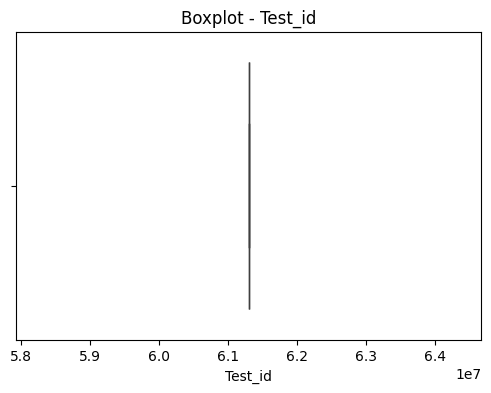

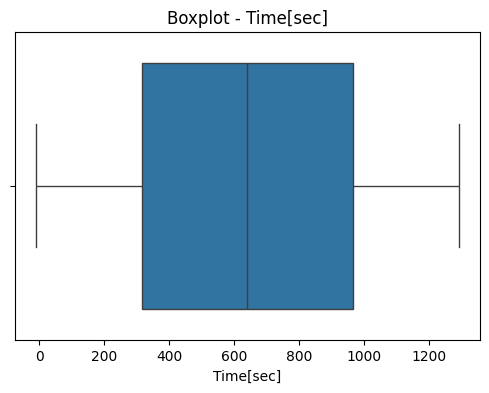

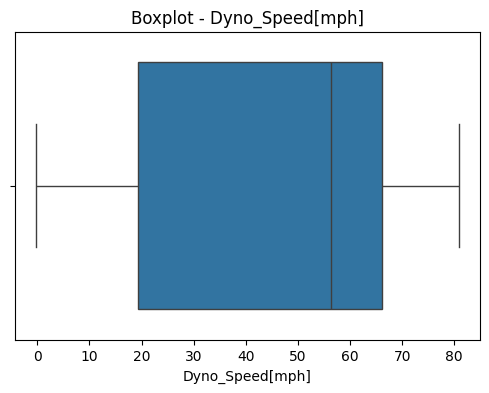

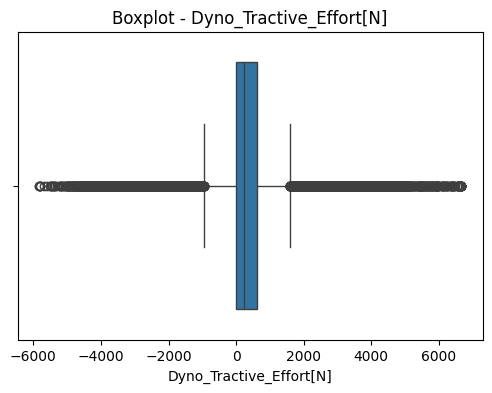

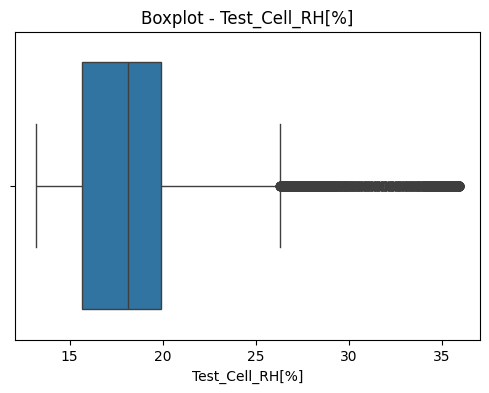

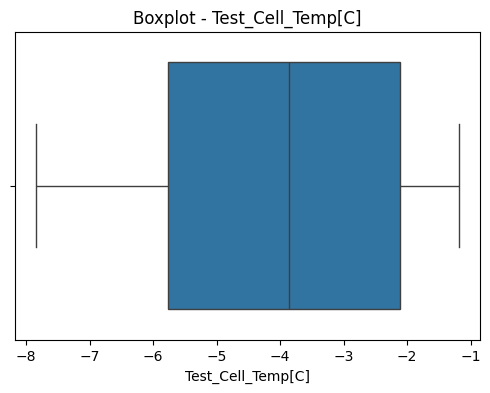

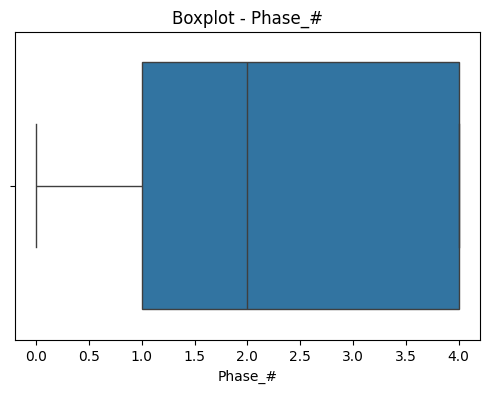

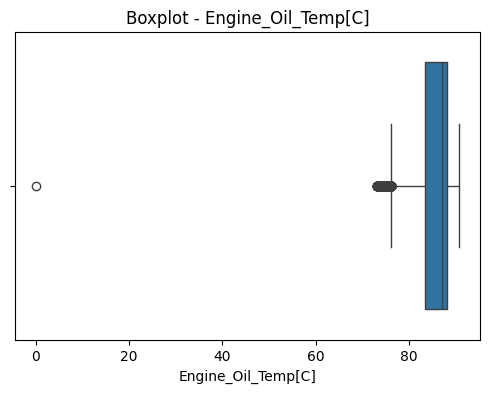

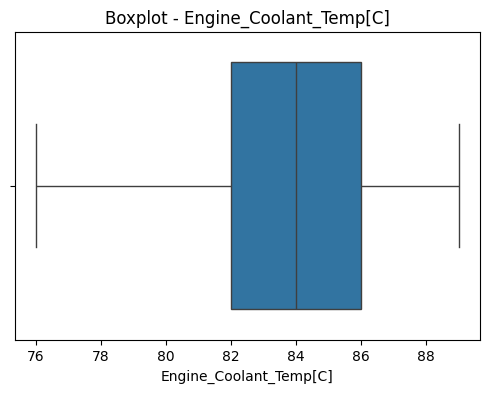

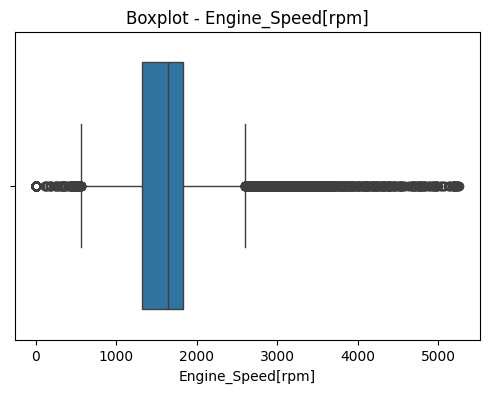

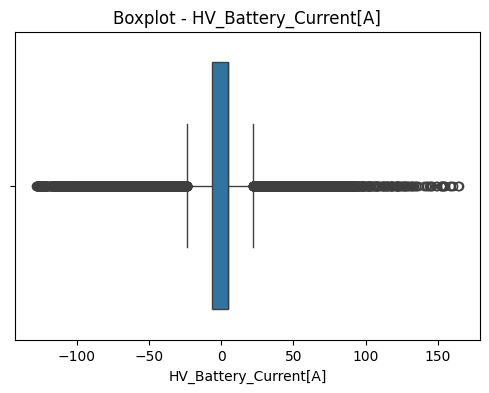

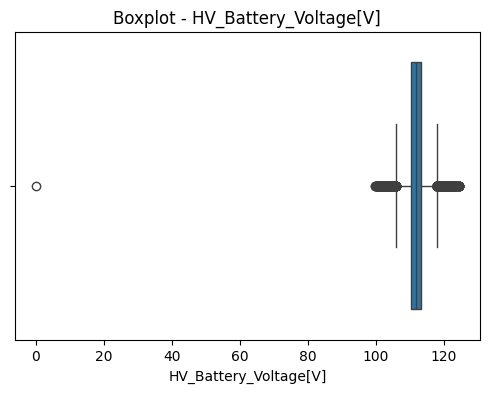

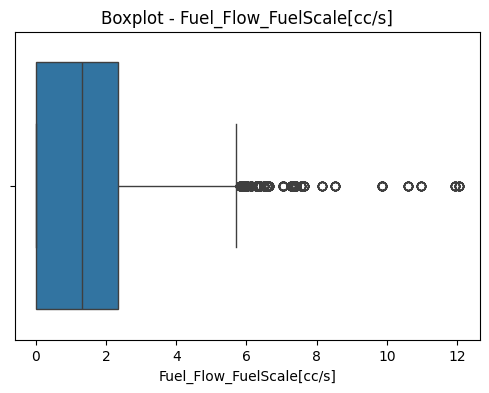

In [14]:
# Gera um boxplot para cada  coluna
for col in df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


In [15]:
for col in df.select_dtypes(include=np.number).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]
    if not outliers.empty:
        print(f"Coluna {col} tem {len(outliers)} outliers")


Coluna Dyno_Tractive_Effort[N] tem 3147 outliers
Coluna Test_Cell_RH[%] tem 2076 outliers
Coluna Engine_Oil_Temp[C] tem 778 outliers
Coluna Engine_Speed[rpm] tem 3275 outliers
Coluna HV_Battery_Current[A] tem 3585 outliers
Coluna HV_Battery_Voltage[V] tem 1339 outliers
Coluna Fuel_Flow_FuelScale[cc/s] tem 412 outliers


#### Correlação

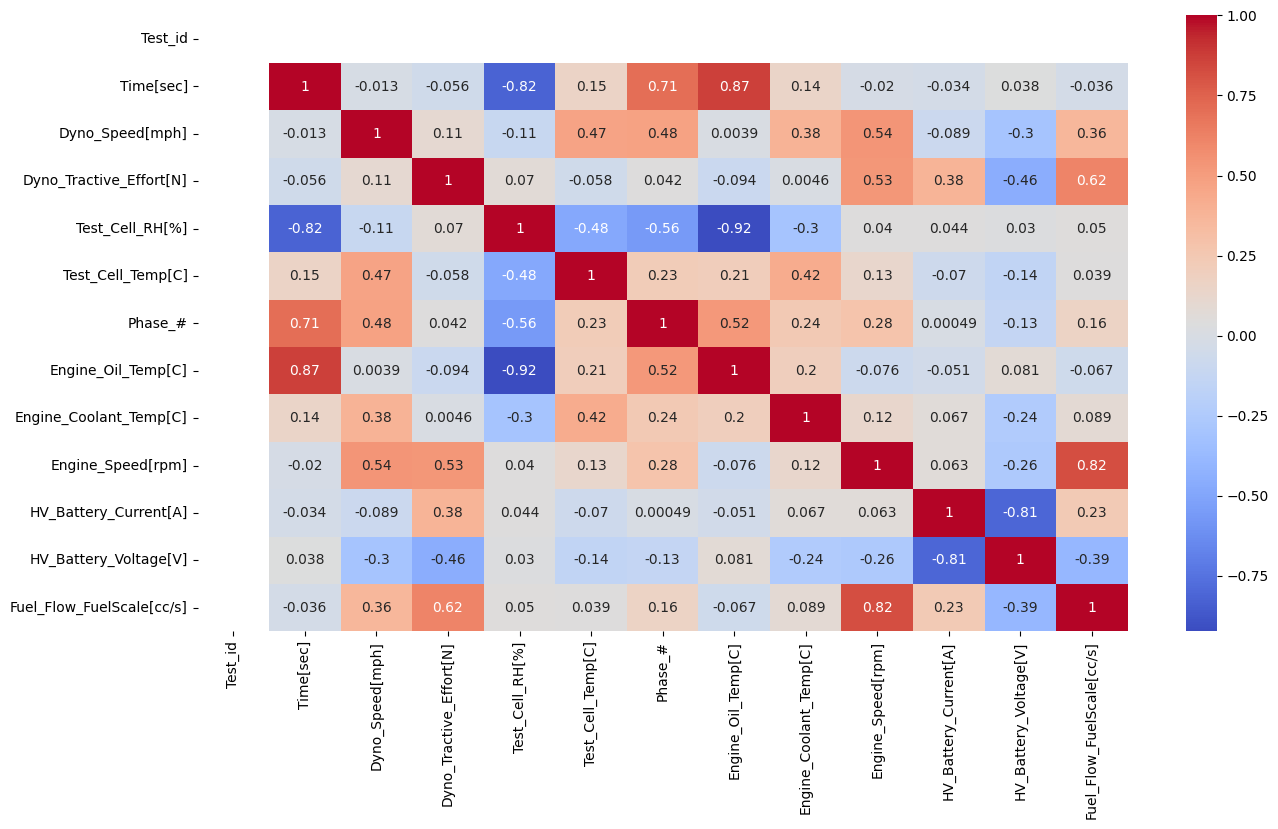

In [16]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## Criação de novas colunas

In [17]:
# Converter mph para km/h
df['Dyno_Speed[kmh]'] = df['Dyno_Speed[mph]'] * 1.60934

In [18]:
# Potência da Bateria
# A fórmula é Potência (W) = Tensão (V) * Corrente (A)
df["HV_Battery_Power[W]"] = df["HV_Battery_Current[A]"] * df["HV_Battery_Voltage[V]"]

df["HV_Battery_Power[kW]"] = df["HV_Battery_Power[W]"] / 1000

In [19]:
df.drop(['Dyno_Speed[mph]', 'HV_Battery_Power[W]'], axis=1, inplace=True)

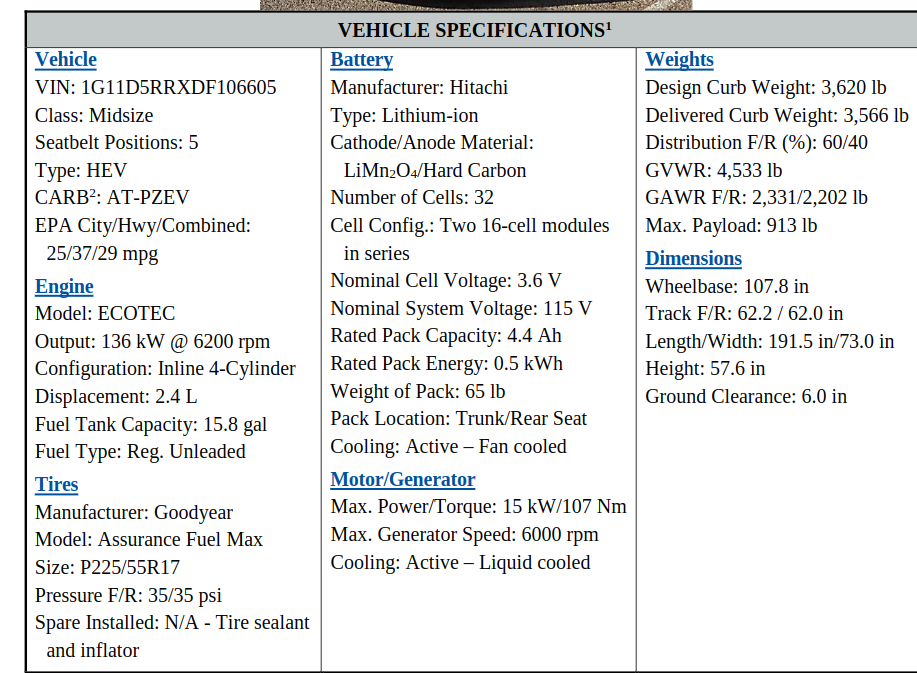

In [20]:
from IPython.display import Image, display
display(Image(filename="vehicle_specifications.png"))

#### SOC

In [21]:
# Calculamos a diferença de tempo entre os pontos
time_diff = np.diff(df['Time[sec]'], prepend=0)

# Capacidade nominal da bateria do Malibu Eco 2013
# 4.4 Ah ou 0.5 kWh
capacidade_bateria_ah = 4.4

# Calcule a alteração na carga (em Ah) integrando a corrente ao longo do tempo
delta_charge_ah = np.cumsum(df['HV_Battery_Current[A]'] * time_diff) / 3600

# Assuma um SOC inicial para o teste, por exemplo, 50%
soc_inicial = 50

# Estime o SOC em porcentagem ao longo do tempo
# A alteração no SOC é (alteração na carga / capacidade) * 100
df['SOC_Estimado_%'] = soc_inicial + (delta_charge_ah / capacidade_bateria_ah) * 100

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Test_id                    13001 non-null  int64  
 1   Time[sec]                  13001 non-null  float64
 2   Dyno_Tractive_Effort[N]    13001 non-null  float64
 3   Test_Cell_RH[%]            13001 non-null  float64
 4   Test_Cell_Temp[C]          13001 non-null  float64
 5   Phase_#                    13001 non-null  float64
 6   Engine_Oil_Temp[C]         13001 non-null  float64
 7   Engine_Coolant_Temp[C]     13001 non-null  float64
 8   Engine_Speed[rpm]          13001 non-null  float64
 9   HV_Battery_Current[A]      13001 non-null  float64
 10  HV_Battery_Voltage[V]      13001 non-null  float64
 11  Fuel_Flow_FuelScale[cc/s]  13001 non-null  float64
 12  Dyno_Speed[kmh]            13001 non-null  float64
 13  HV_Battery_Power[kW]       13001 non-null  flo

### Gráficos 

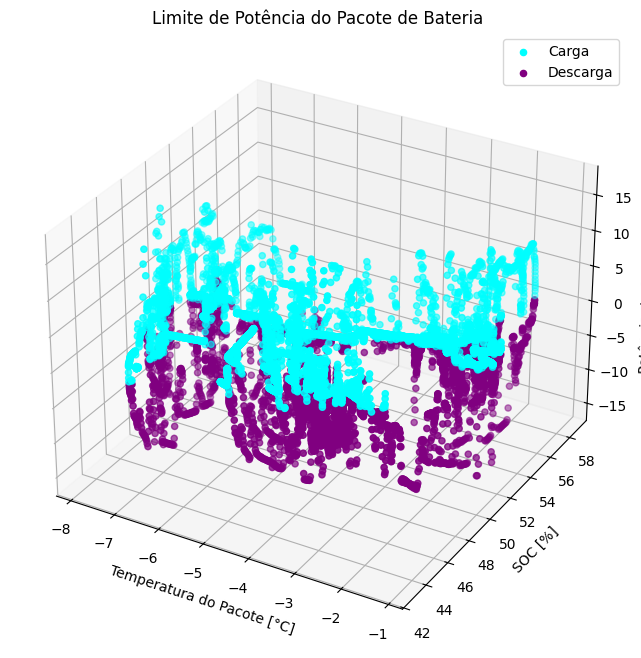

In [23]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plote a Potência de Carga (Positiva) e Descarga (Negativa)
ax.scatter(df[df["HV_Battery_Power[kW]"] >= 0]['Test_Cell_Temp[C]'],
           df[df["HV_Battery_Power[kW]"] >= 0]['SOC_Estimado_%'],
           df[df["HV_Battery_Power[kW]"] >= 0]["HV_Battery_Power[kW]"],
           c='cyan', label='Carga')

ax.scatter(df[df["HV_Battery_Power[kW]"] < 0]['Test_Cell_Temp[C]'],
           df[df["HV_Battery_Power[kW]"] < 0]['SOC_Estimado_%'],
           df[df["HV_Battery_Power[kW]"] < 0]["HV_Battery_Power[kW]"],
           c='purple', label='Descarga')

ax.set_title('Limite de Potência do Pacote de Bateria')
ax.set_xlabel('Temperatura do Pacote [°C]')
ax.set_ylabel('SOC [%]')
ax.set_zlabel('Potência do Pacote [kW]')
ax.legend()

plt.show()

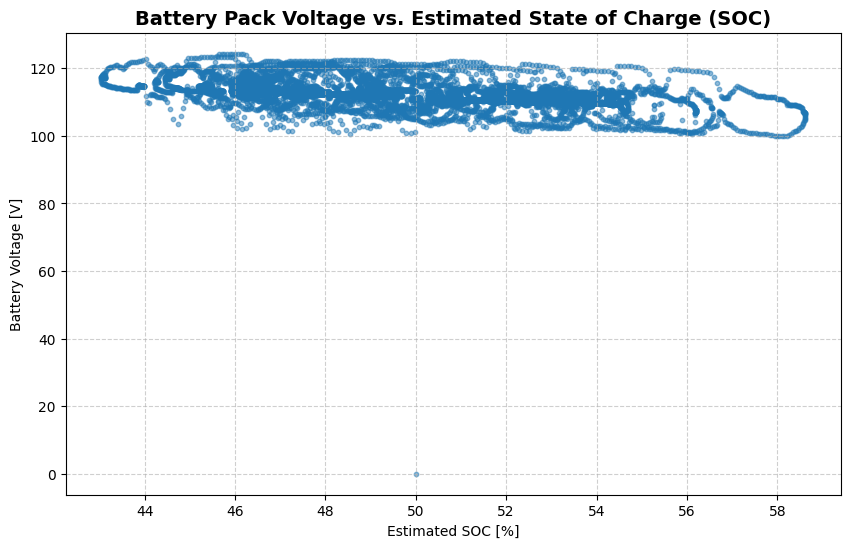

In [24]:
# Plot Voltage vs. Estimated SOC
plt.figure(figsize=(10, 6))
plt.scatter(df['SOC_Estimado_%'], df['HV_Battery_Voltage[V]'], alpha=0.5, s=10)
plt.title('Battery Pack Voltage vs. Estimated State of Charge (SOC)', fontsize=14, fontweight='bold')
plt.xlabel('Estimated SOC [%]')
plt.ylabel('Battery Voltage [V]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

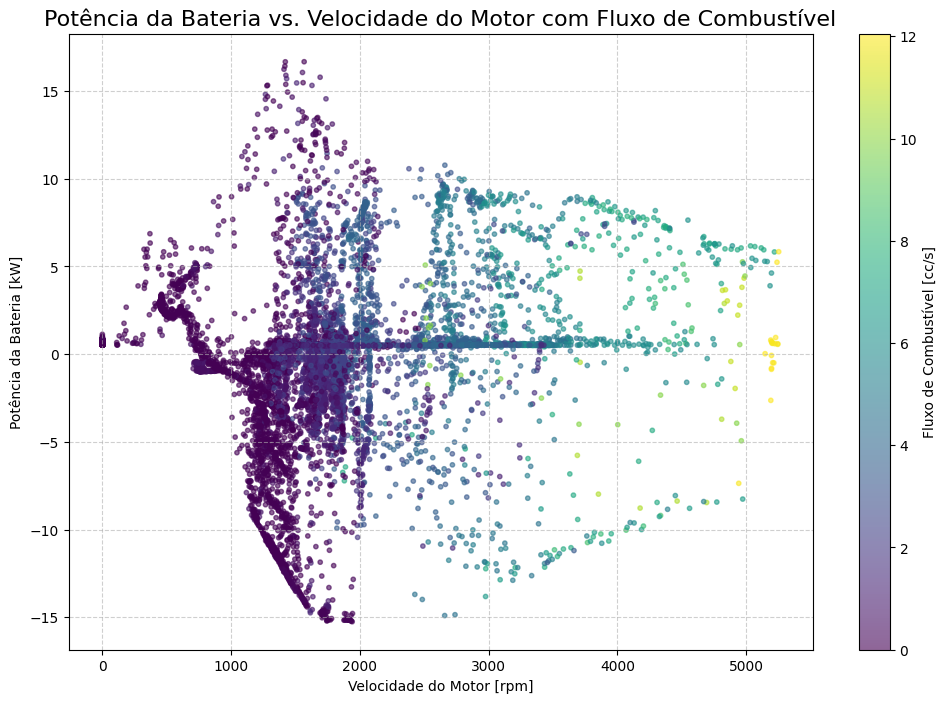

In [25]:
plt.figure(figsize=(12, 8))
# Cria um gráfico de dispersão com o fluxo de combustível como a cor
sc = plt.scatter(df['Engine_Speed[rpm]'], df['HV_Battery_Power[kW]'],
                 c=df['Fuel_Flow_FuelScale[cc/s]'], cmap='viridis', s=10, alpha=0.6)
plt.colorbar(sc, label='Fluxo de Combustível [cc/s]')

plt.title('Potência da Bateria vs. Velocidade do Motor com Fluxo de Combustível', fontsize=16)
plt.xlabel('Velocidade do Motor [rpm]')
plt.ylabel('Potência da Bateria [kW]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

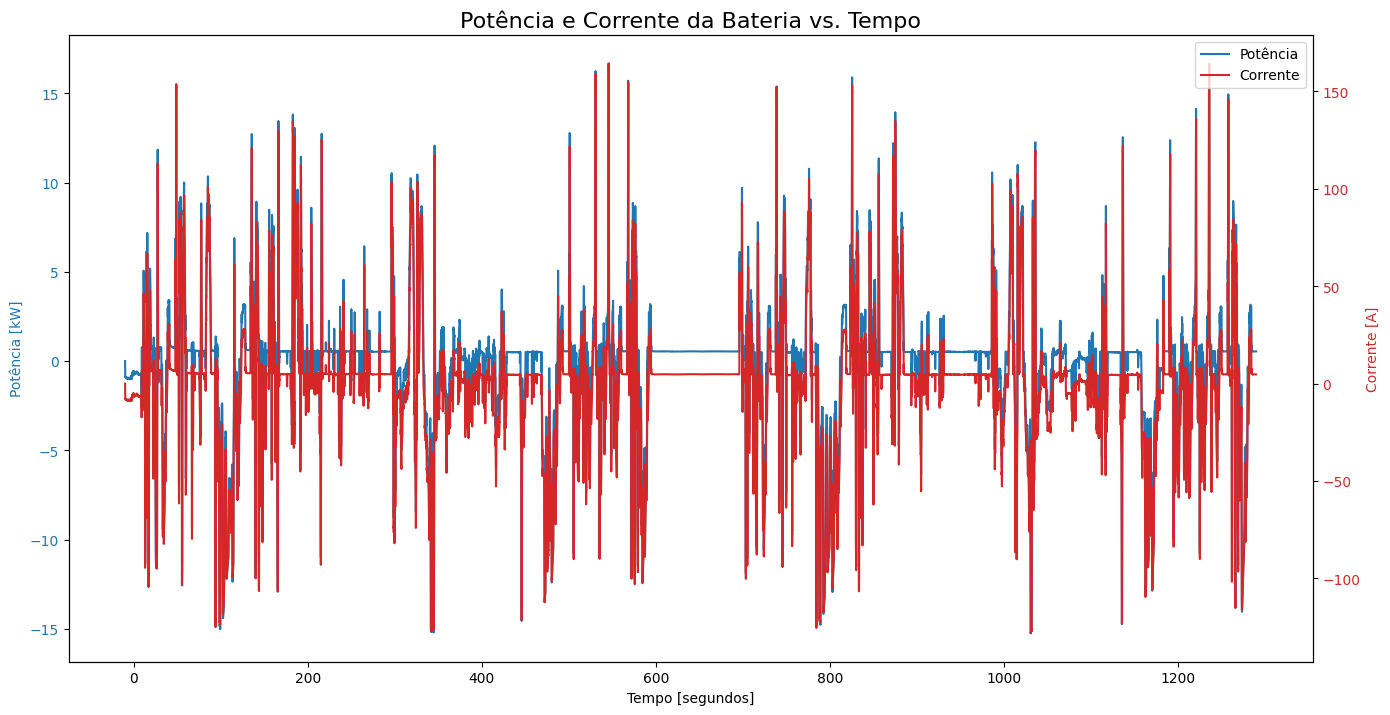

In [26]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotar Potência da Bateria no primeiro eixo Y
color = 'tab:blue'
ax1.set_xlabel('Tempo [segundos]')
ax1.set_ylabel('Potência [kW]', color=color)
ax1.plot(df['Time[sec]'], df['HV_Battery_Power[kW]'], color=color, label='Potência')
ax1.tick_params(axis='y', labelcolor=color)

# Criar um segundo eixo Y para a Corrente
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Corrente [A]', color=color)
ax2.plot(df['Time[sec]'], df['HV_Battery_Current[A]'], color=color, label='Corrente')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Potência e Corrente da Bateria vs. Tempo', fontsize=16)
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

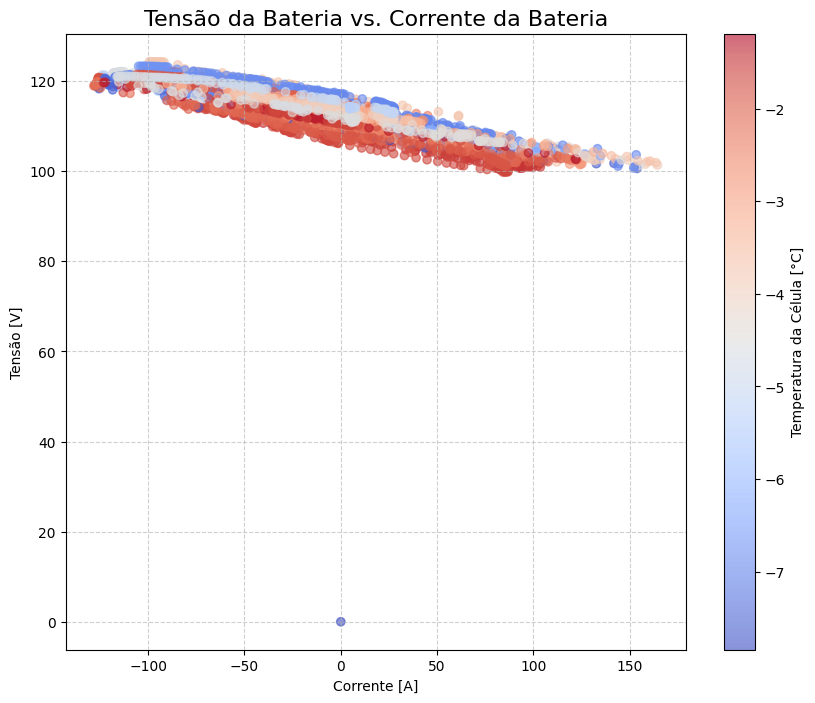

In [27]:
plt.figure(figsize=(10, 8))

# Criar o gráfico de dispersão com cor baseada na temperatura
sc = plt.scatter(df['HV_Battery_Current[A]'], df['HV_Battery_Voltage[V]'],
                 c=df['Test_Cell_Temp[C]'], cmap='coolwarm', alpha=0.6)

plt.colorbar(sc, label='Temperatura da Célula [°C]')
plt.title('Tensão da Bateria vs. Corrente da Bateria', fontsize=16)
plt.xlabel('Corrente [A]')
plt.ylabel('Tensão [V]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


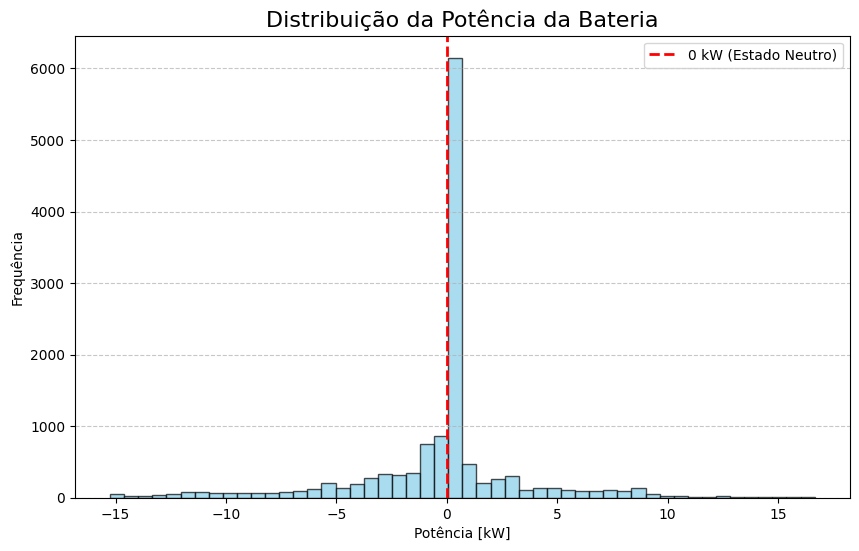

In [28]:
plt.figure(figsize=(10, 6))

plt.hist(df['HV_Battery_Power[kW]'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribuição da Potência da Bateria', fontsize=16)
plt.xlabel('Potência [kW]')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='0 kW (Estado Neutro)')
plt.legend()
plt.show()

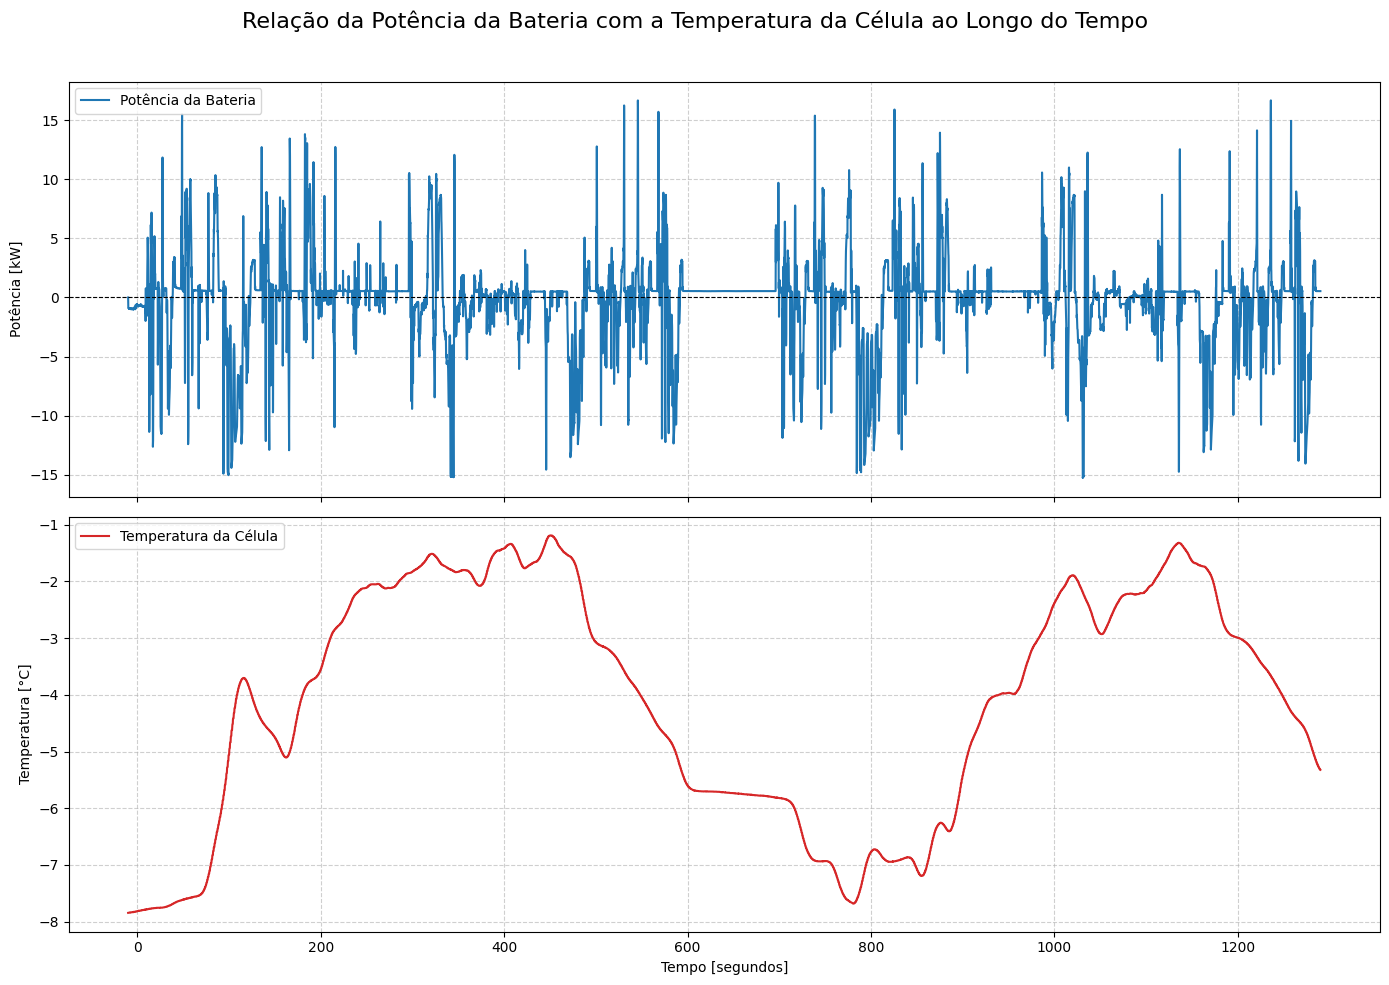

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Relação da Potência da Bateria com a Temperatura da Célula ao Longo do Tempo', fontsize=16)

# Gráfico 1: Potência vs. Tempo
ax1.plot(df['Time[sec]'], df['HV_Battery_Power[kW]'], color='tab:blue', label='Potência da Bateria')
ax1.set_ylabel('Potência [kW]')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend()
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Gráfico 2: Temperatura da Célula vs. Tempo
ax2.plot(df['Time[sec]'], df['Test_Cell_Temp[C]'], color='tab:red', label='Temperatura da Célula')
ax2.set_xlabel('Tempo [segundos]')
ax2.set_ylabel('Temperatura [°C]')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/tmp/ipykernel_8140/3582438337.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Phase_#', y='Test_Cell_Temp[C]', data=df, palette='viridis')


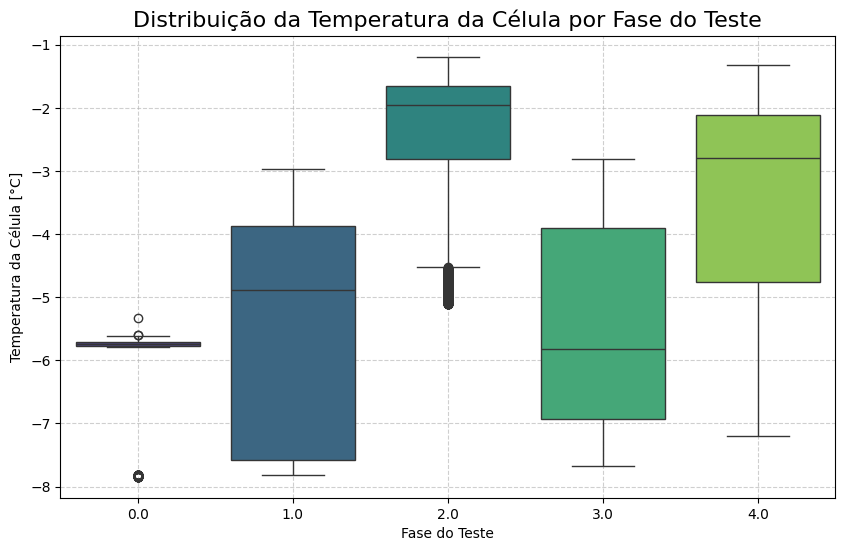

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x='Phase_#', y='Test_Cell_Temp[C]', data=df, palette='viridis')

plt.title('Distribuição da Temperatura da Célula por Fase do Teste', fontsize=16)
plt.xlabel('Fase do Teste')
plt.ylabel('Temperatura da Célula [°C]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

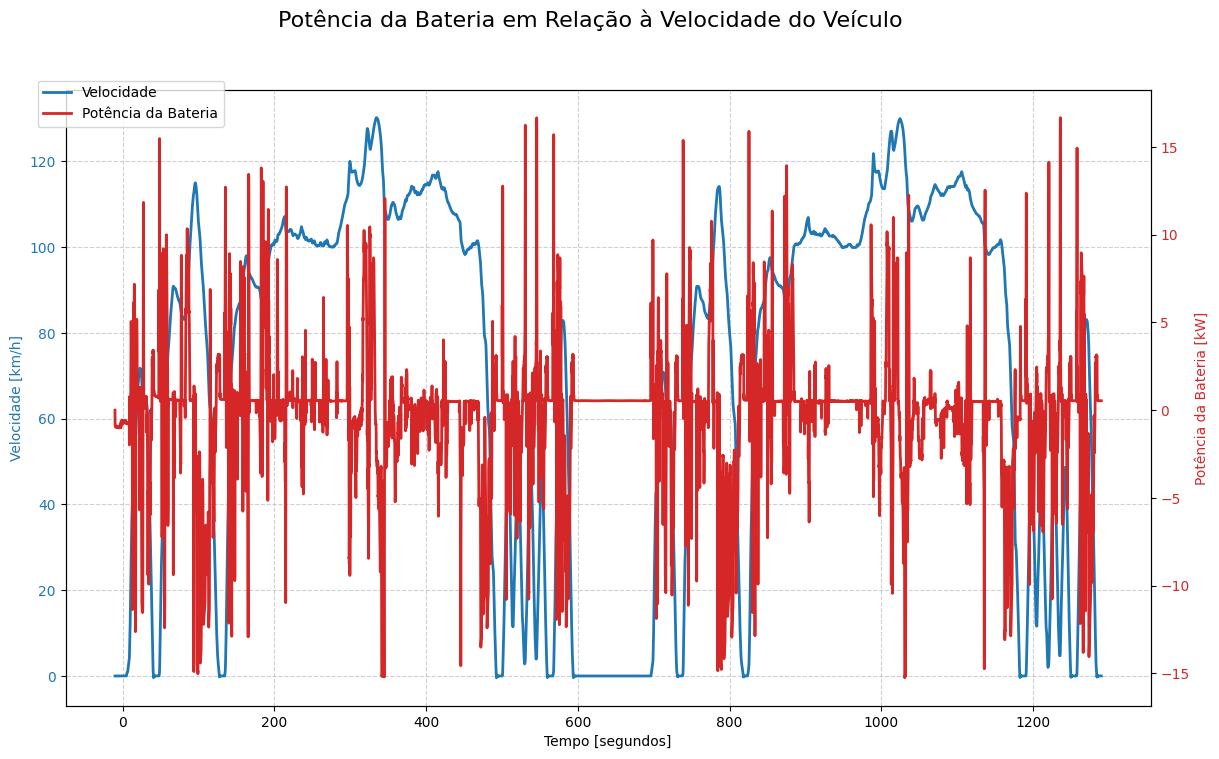

In [31]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotar a velocidade do veículo
color = 'tab:blue'
ax1.set_xlabel('Tempo [segundos]')
ax1.set_ylabel('Velocidade [km/h]', color=color)
ax1.plot(df['Time[sec]'], df['Dyno_Speed[kmh]'], color=color, linewidth=2, label='Velocidade')
ax1.tick_params(axis='y', labelcolor=color)

# Criar um segundo eixo para a potência da bateria
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Potência da Bateria [kW]', color=color)
ax2.plot(df['Time[sec]'], df['HV_Battery_Power[kW]'], color=color, linewidth=2, label='Potência da Bateria')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Potência da Bateria em Relação à Velocidade do Veículo', fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True, linestyle='--', alpha=0.6)
plt.show()

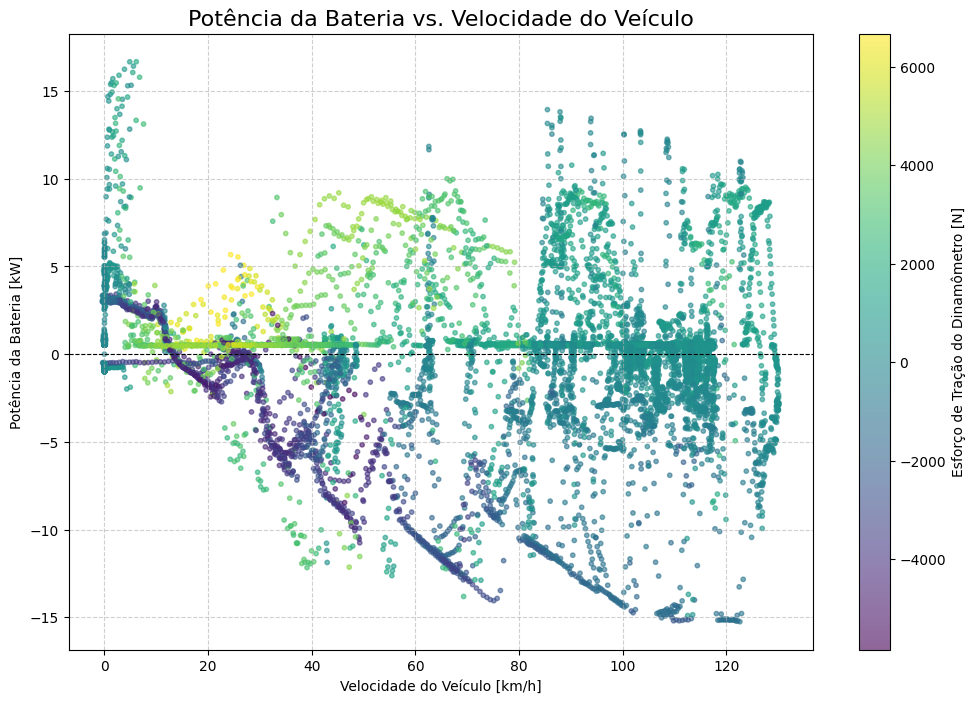

In [32]:
plt.figure(figsize=(12, 8))

sc = plt.scatter(df['Dyno_Speed[kmh]'], df['HV_Battery_Power[kW]'],
                 c=df['Dyno_Tractive_Effort[N]'], cmap='viridis', s=10, alpha=0.6)

plt.colorbar(sc, label='Esforço de Tração do Dinamômetro [N]')

plt.title('Potência da Bateria vs. Velocidade do Veículo', fontsize=16)
plt.xlabel('Velocidade do Veículo [km/h]')
plt.ylabel('Potência da Bateria [kW]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

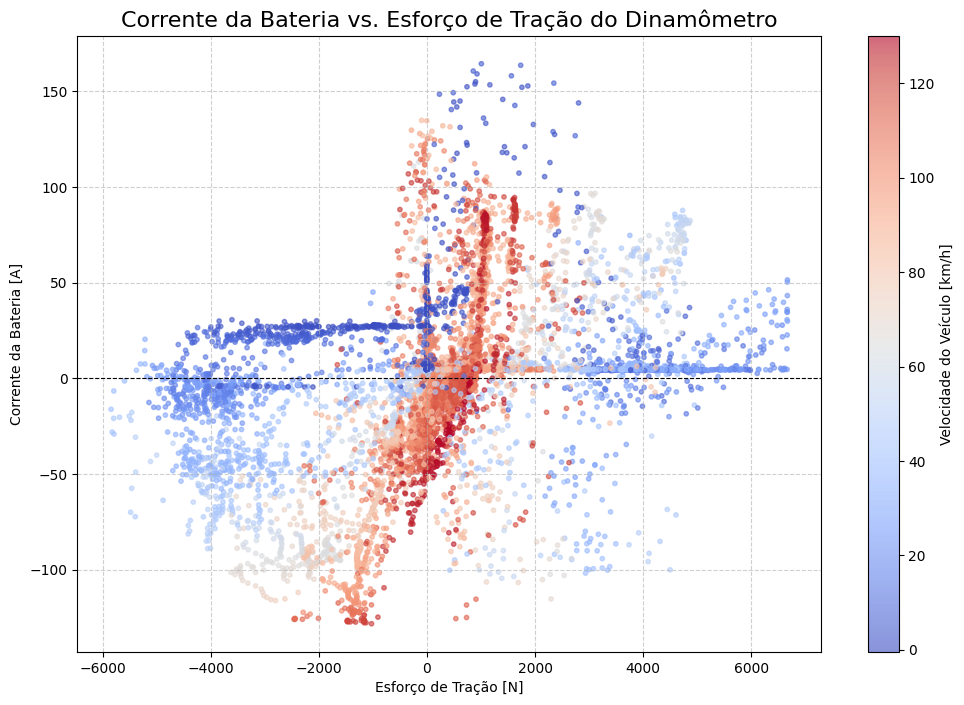

In [33]:
plt.figure(figsize=(12, 8))

plt.scatter(df['Dyno_Tractive_Effort[N]'], df['HV_Battery_Current[A]'],
            c=df['Dyno_Speed[kmh]'], cmap='coolwarm', s=10, alpha=0.6)

plt.colorbar(label='Velocidade do Veículo [km/h]')
plt.title('Corrente da Bateria vs. Esforço de Tração do Dinamômetro', fontsize=16)
plt.xlabel('Esforço de Tração [N]')
plt.ylabel('Corrente da Bateria [A]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

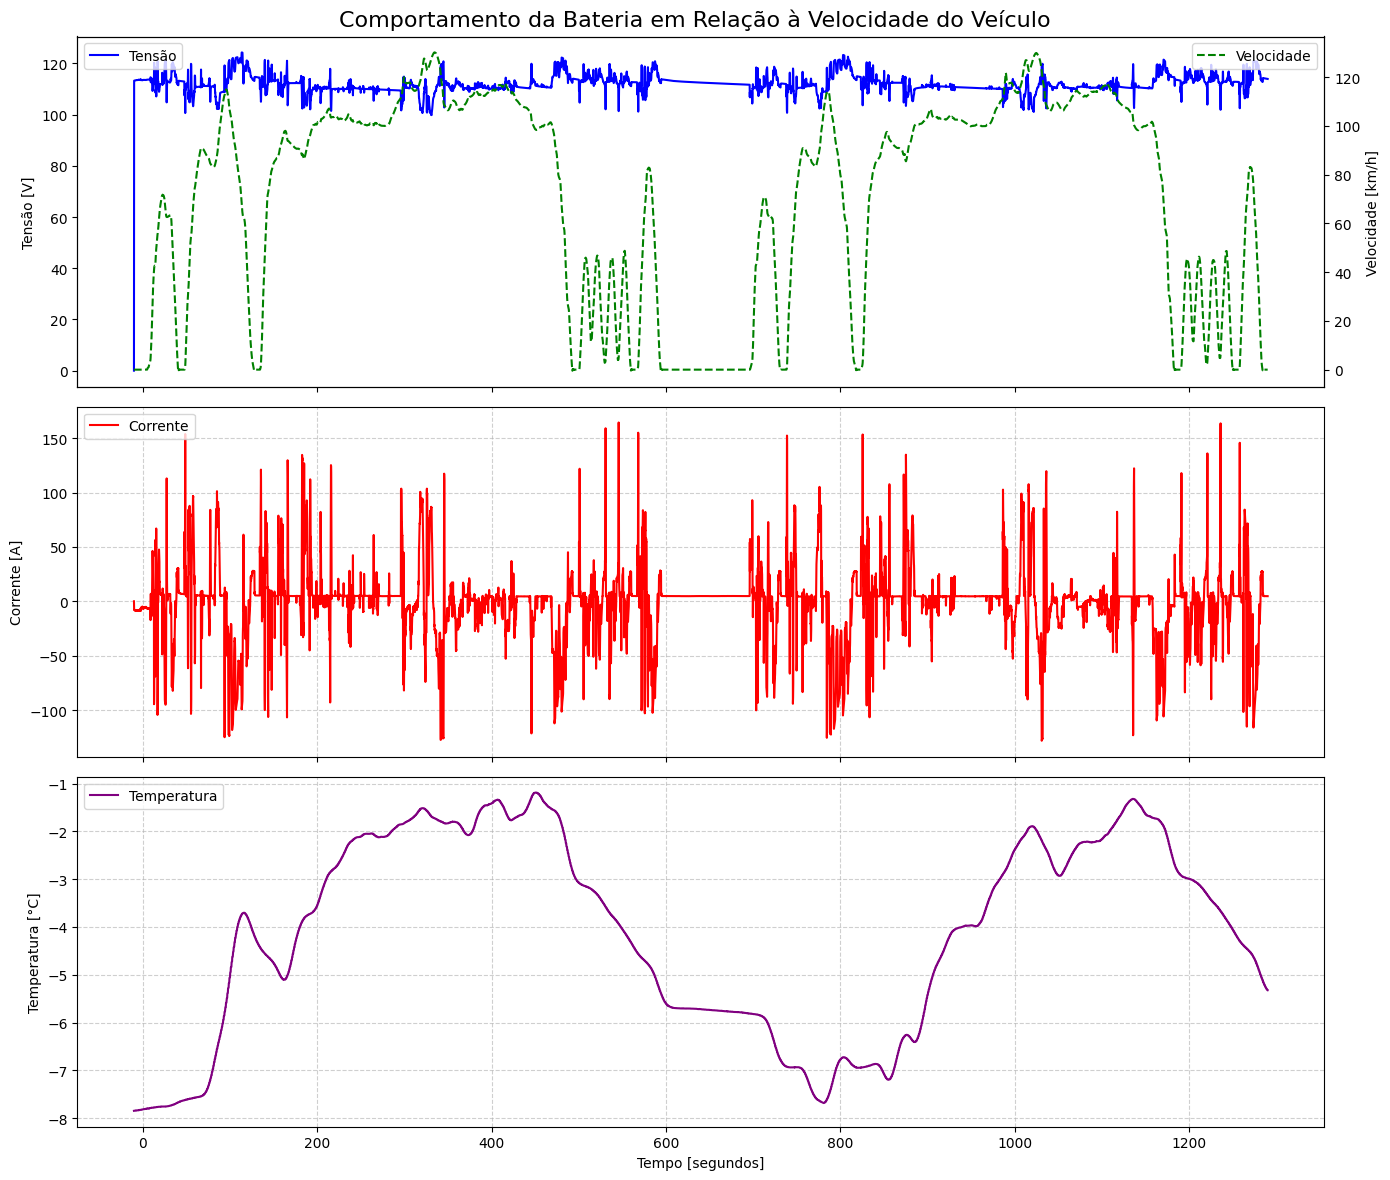

In [34]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
fig.suptitle('Comportamento da Bateria em Relação à Velocidade do Veículo', fontsize=16)

# Tensão da Bateria vs. Tempo
axs[0].plot(df['Time[sec]'], df['HV_Battery_Voltage[V]'], label='Tensão', color='b')
axs[0].set_ylabel('Tensão [V]')
ax1_twin = axs[0].twinx()
ax1_twin.plot(df['Time[sec]'], df['Dyno_Speed[kmh]'], label='Velocidade', color='g', linestyle='--')
ax1_twin.set_ylabel('Velocidade [km/h]')
axs[0].legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Corrente da Bateria vs. Tempo
axs[1].plot(df['Time[sec]'], df['HV_Battery_Current[A]'], label='Corrente', color='r')
axs[1].set_ylabel('Corrente [A]')
axs[1].legend(loc='upper left')
axs[1].grid(True, linestyle='--', alpha=0.6)

# Temperatura da Célula vs. Tempo
axs[2].plot(df['Time[sec]'], df['Test_Cell_Temp[C]'], label='Temperatura', color='purple')
axs[2].set_ylabel('Temperatura [°C]')
axs[2].set_xlabel('Tempo [segundos]')
axs[2].legend(loc='upper left')
axs[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

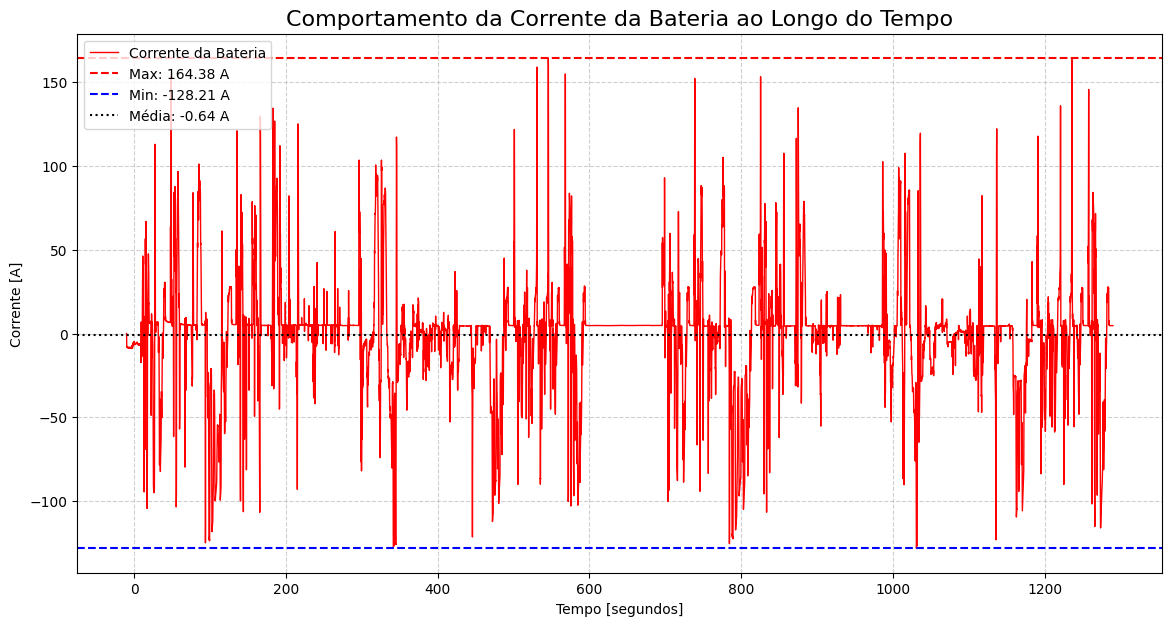

In [35]:
# Calcular estatísticas para a corrente
current_max = df['HV_Battery_Current[A]'].max()
current_min = df['HV_Battery_Current[A]'].min()
current_mean = df['HV_Battery_Current[A]'].mean()

plt.figure(figsize=(14, 7))

plt.plot(df['Time[sec]'], df['HV_Battery_Current[A]'], label='Corrente da Bateria', color='r', linewidth=1)
plt.axhline(current_max, color='r', linestyle='--', label=f'Max: {current_max:.2f} A')
plt.axhline(current_min, color='b', linestyle='--', label=f'Min: {current_min:.2f} A')
plt.axhline(current_mean, color='k', linestyle=':', label=f'Média: {current_mean:.2f} A')

plt.title('Comportamento da Corrente da Bateria ao Longo do Tempo', fontsize=16)
plt.xlabel('Tempo [segundos]')
plt.ylabel('Corrente [A]')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/tmp/ipykernel_8140/2694328312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Phase_#', y='HV_Battery_Power[kW]', data=df, palette='viridis')


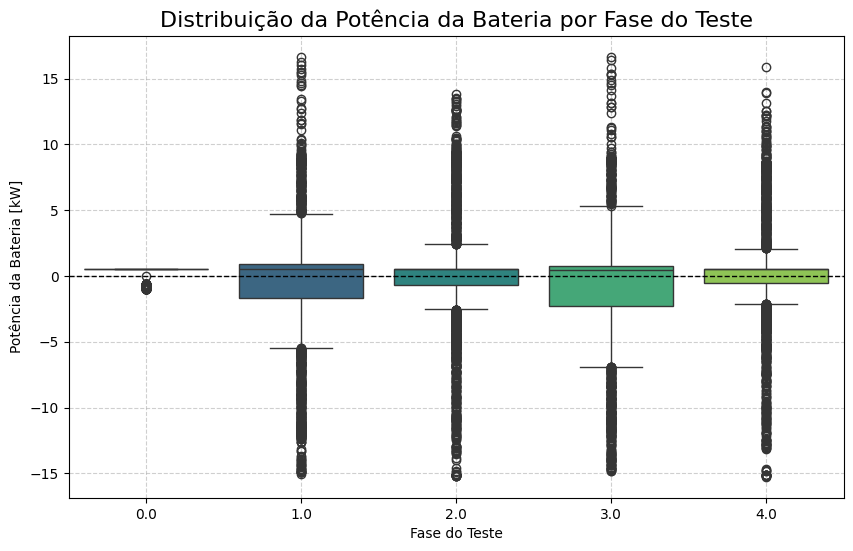

In [48]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Phase_#', y='HV_Battery_Power[kW]', data=df, palette='viridis')

plt.title('Distribuição da Potência da Bateria por Fase do Teste', fontsize=16)
plt.xlabel('Fase do Teste')
plt.ylabel('Potência da Bateria [kW]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.show()

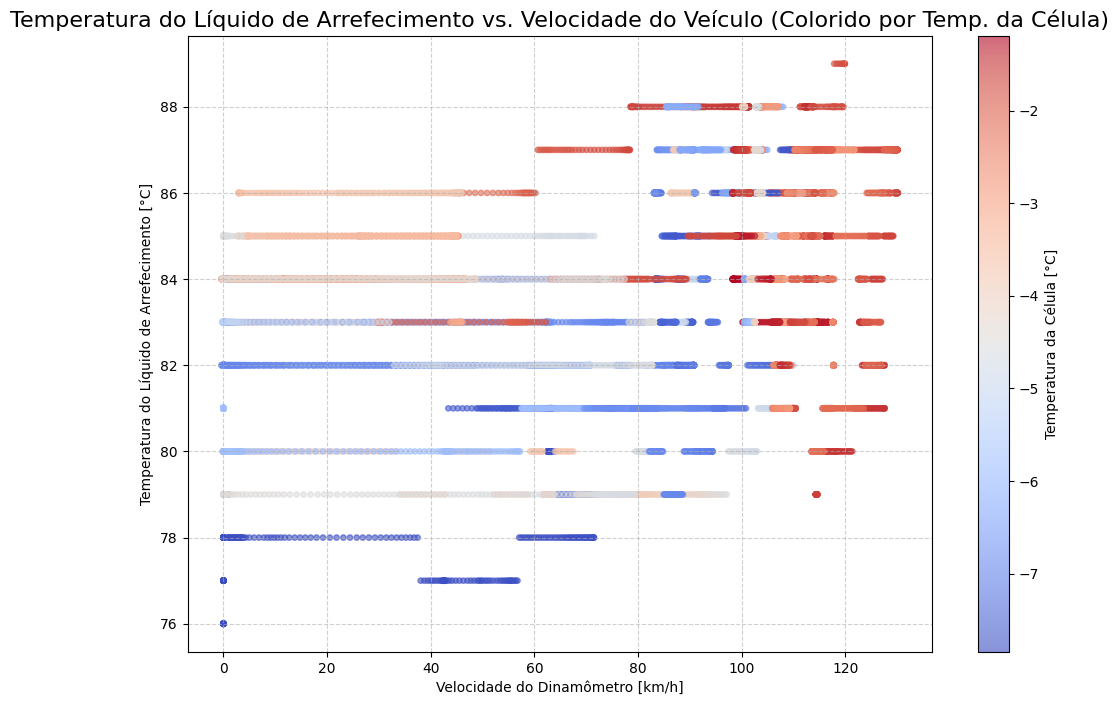

In [49]:
plt.figure(figsize=(12, 8))

sc = plt.scatter(df['Dyno_Speed[kmh]'], df['Engine_Coolant_Temp[C]'],
                 c=df['Test_Cell_Temp[C]'], cmap='coolwarm', s=15, alpha=0.6)

plt.colorbar(sc, label='Temperatura da Célula [°C]')

plt.title('Temperatura do Líquido de Arrefecimento vs. Velocidade do Veículo (Colorido por Temp. da Célula)', fontsize=16)
plt.xlabel('Velocidade do Dinamômetro [km/h]')
plt.ylabel('Temperatura do Líquido de Arrefecimento [°C]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

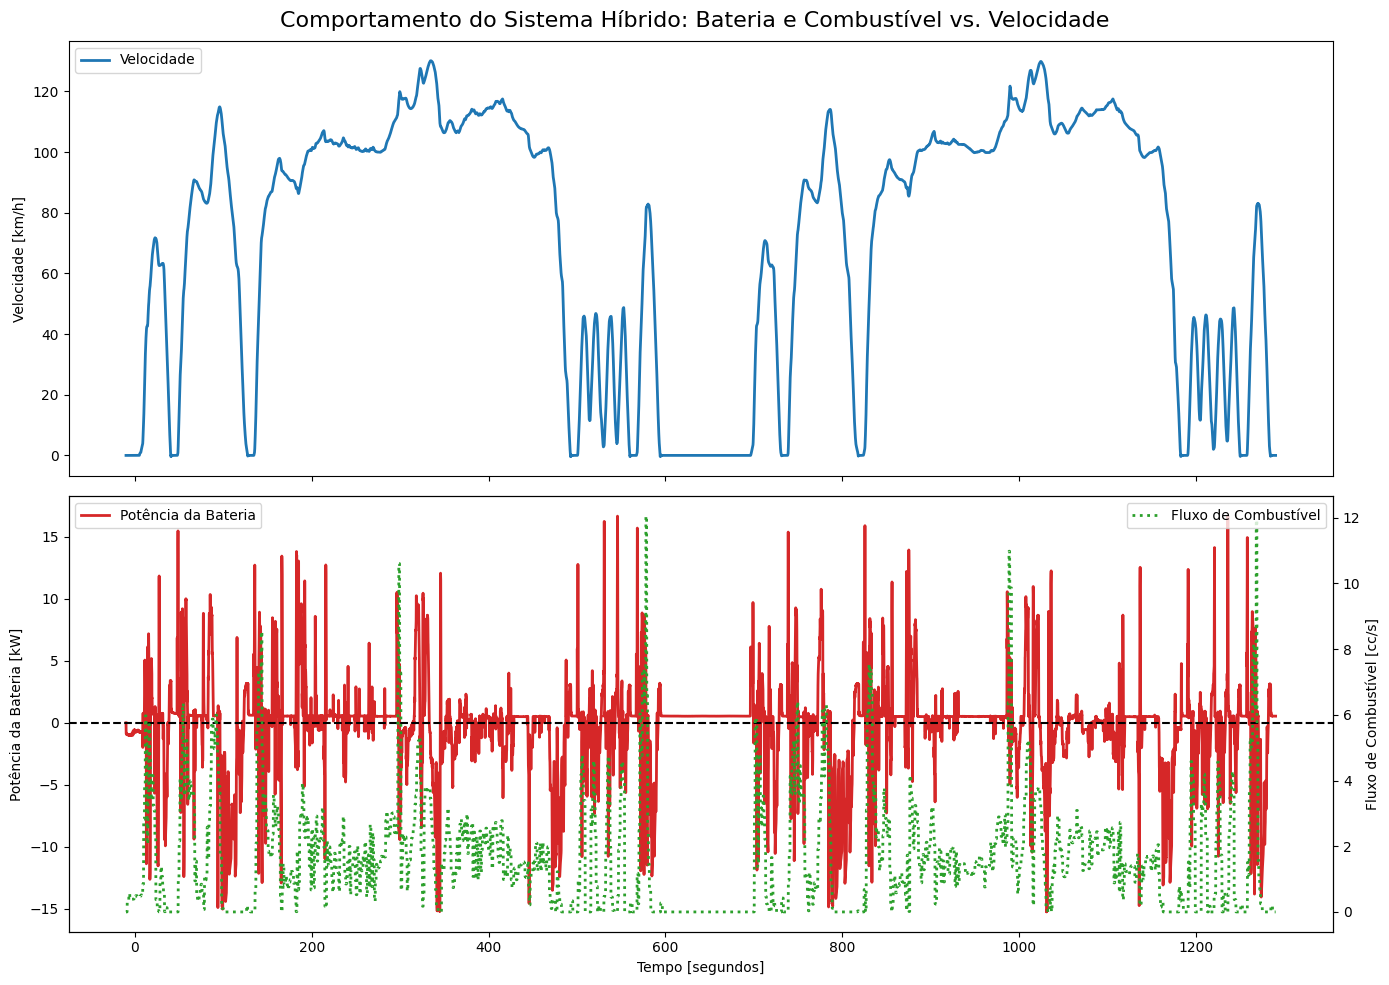

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Comportamento do Sistema Híbrido: Bateria e Combustível vs. Velocidade', fontsize=16)

# Velocidade do Veículo
ax1.plot(df['Time[sec]'], df['Dyno_Speed[kmh]'], label='Velocidade', color='tab:blue', linewidth=2)
ax1.set_ylabel('Velocidade [km/h]')
ax1.legend(loc='upper left')

# Potência da Bateria e Fluxo de Combustível
ax2_twin = ax2.twinx()
ax2.plot(df['Time[sec]'], df['HV_Battery_Power[kW]'], label='Potência da Bateria', color='tab:red', linewidth=2)
ax2.set_ylabel('Potência da Bateria [kW]')
ax2.axhline(0, color='black', linestyle='--')
ax2.legend(loc='upper left')

ax2_twin.plot(df['Time[sec]'], df['Fuel_Flow_FuelScale[cc/s]'], label='Fluxo de Combustível', color='tab:green', linewidth=2, linestyle=':')
ax2_twin.set_ylabel('Fluxo de Combustível [cc/s]')
ax2_twin.legend(loc='upper right')

ax2.set_xlabel('Tempo [segundos]')

plt.tight_layout()
plt.show()

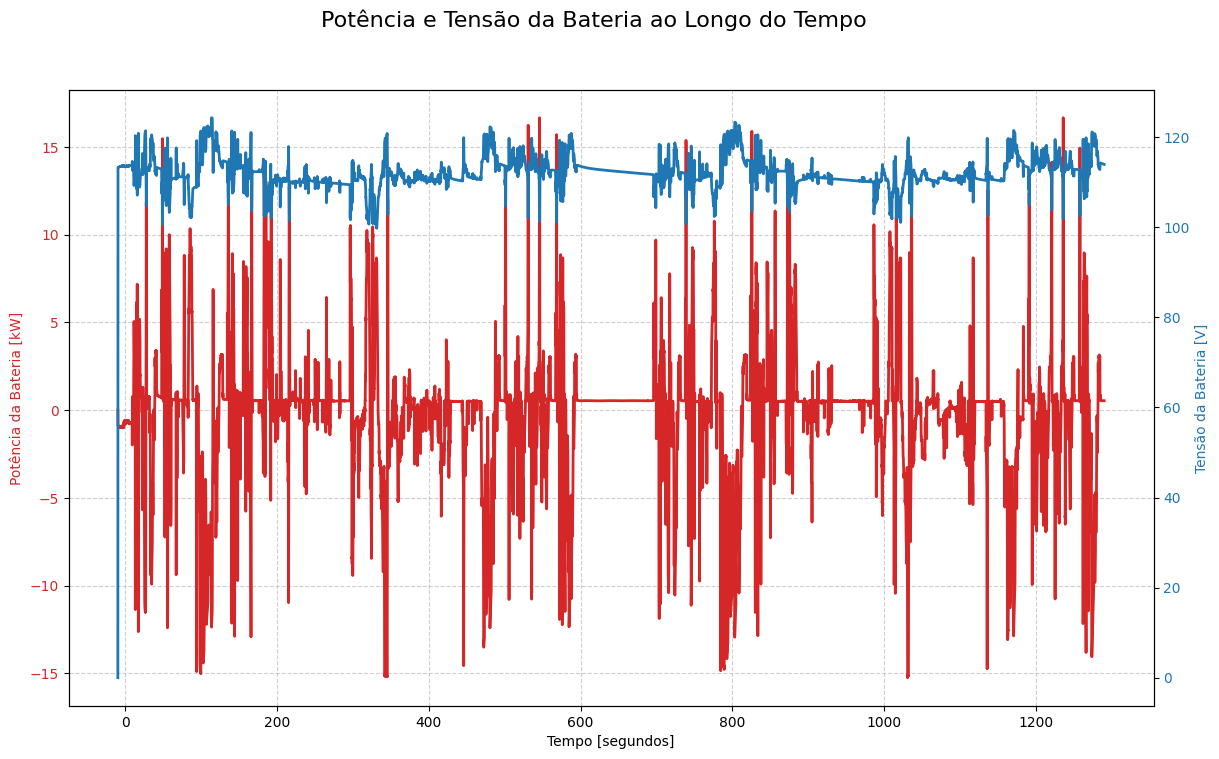

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotar a potência da bateria
color = 'tab:red'
ax1.set_xlabel('Tempo [segundos]')
ax1.set_ylabel('Potência da Bateria [kW]', color=color)
ax1.plot(df['Time[sec]'], df['HV_Battery_Power[kW]'], color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# Criar um segundo eixo para a tensão da bateria
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Tensão da Bateria [V]', color=color)
ax2.plot(df['Time[sec]'], df['HV_Battery_Voltage[V]'], color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Potência e Tensão da Bateria ao Longo do Tempo', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.6)
plt.show()

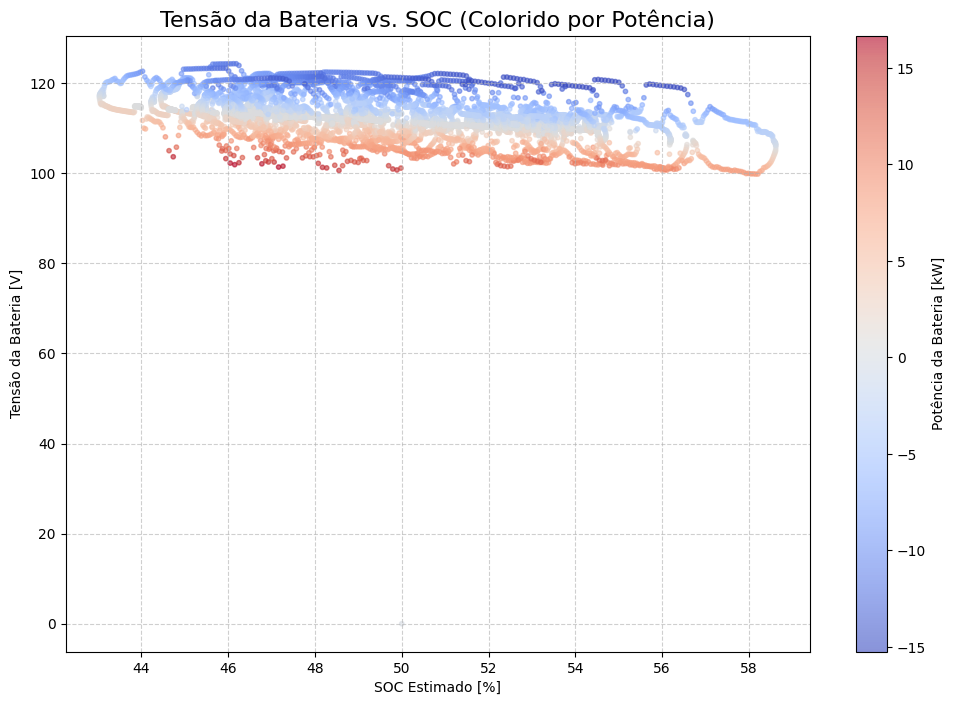

In [ ]:
plt.figure(figsize=(12, 8))

sc = plt.scatter(df['SOC_Estimado_%'], df['HV_Battery_Voltage[V]'],
                 c=df['HV_Battery_Power[kW]'], cmap='coolwarm', s=10, alpha=0.6)

plt.colorbar(sc, label='Potência da Bateria [kW]')
plt.title('Tensão da Bateria vs. SOC (Colorido por Potência)', fontsize=16)
plt.xlabel('SOC Estimado [%]')
plt.ylabel('Tensão da Bateria [V]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

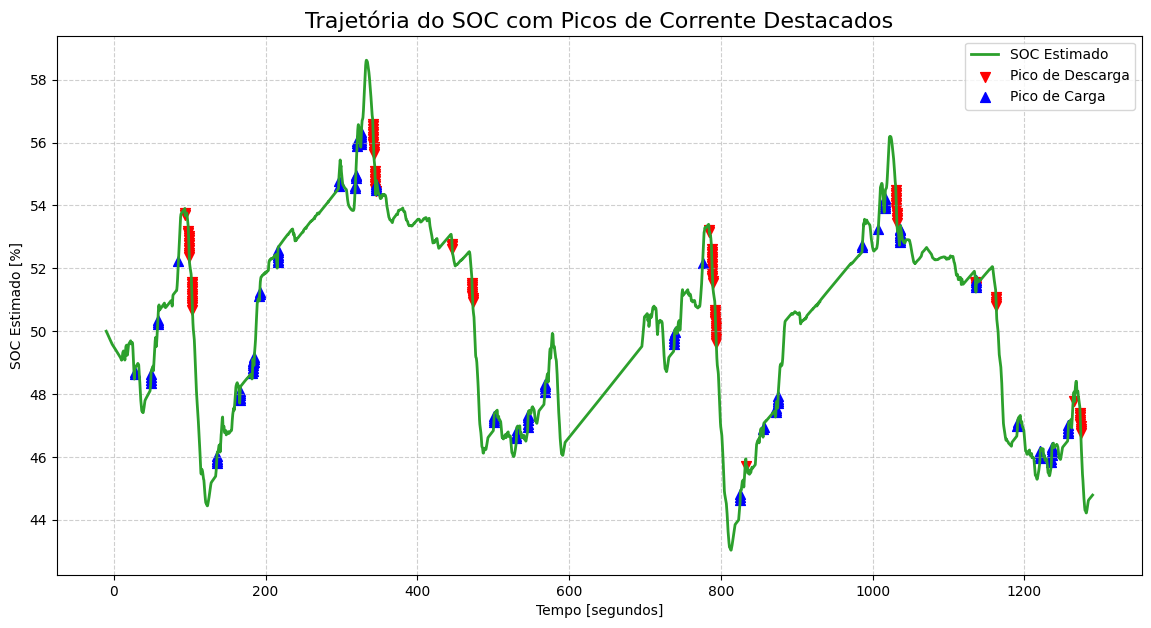

In [ ]:
plt.figure(figsize=(14, 7))

# Plotar a curva de SOC
plt.plot(df['Time[sec]'], df['SOC_Estimado_%'], label='SOC Estimado', color='tab:green', linewidth=2)

# Encontrar picos de corrente de descarga (valores negativos)
current_min_threshold = df['HV_Battery_Current[A]'].quantile(0.01)
discharge_peaks = df[df['HV_Battery_Current[A]'] < current_min_threshold]
plt.scatter(discharge_peaks['Time[sec]'], discharge_peaks['SOC_Estimado_%'],
            color='red', s=50, marker='v', label='Pico de Descarga')

# Encontrar picos de corrente de carga (valores positivos)
current_max_threshold = df['HV_Battery_Current[A]'].quantile(0.99)
charge_peaks = df[df['HV_Battery_Current[A]'] > current_max_threshold]
plt.scatter(charge_peaks['Time[sec]'], charge_peaks['SOC_Estimado_%'],
            color='blue', s=50, marker='^', label='Pico de Carga')

plt.title('Trajetória do SOC com Picos de Corrente Destacados', fontsize=16)
plt.xlabel('Tempo [segundos]')
plt.ylabel('SOC Estimado [%]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

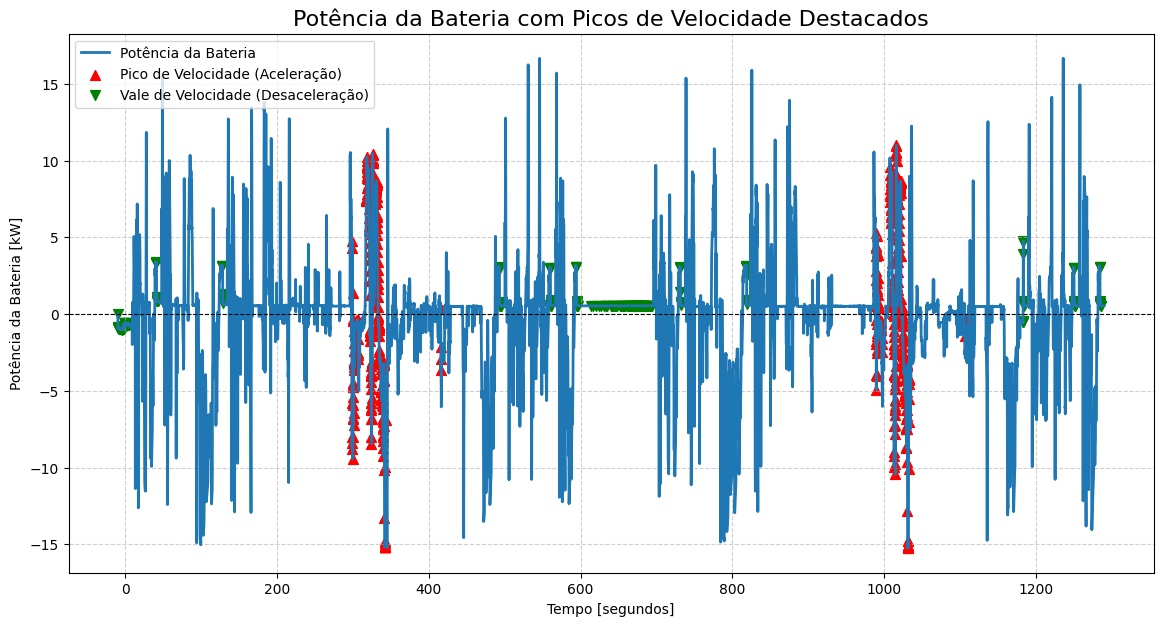

In [51]:
plt.figure(figsize=(14, 7))

# Plot the battery power
plt.plot(df['Time[sec]'], df['HV_Battery_Power[kW]'], label='Potência da Bateria', color='tab:blue', linewidth=2)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Highlight speed peaks (acceleration)
speed_max_threshold = df['Dyno_Speed[kmh]'].quantile(0.95)
speed_peaks = df[df['Dyno_Speed[kmh]'] > speed_max_threshold]
plt.scatter(speed_peaks['Time[sec]'], speed_peaks['HV_Battery_Power[kW]'],
            color='red', s=50, marker='^', label='Pico de Velocidade (Aceleração)')

# Highlight speed valleys (deceleration)
speed_min_threshold = df['Dyno_Speed[kmh]'].quantile(0.05)
speed_valleys = df[df['Dyno_Speed[kmh]'] < speed_min_threshold]
plt.scatter(speed_valleys['Time[sec]'], speed_valleys['HV_Battery_Power[kW]'],
            color='green', s=50, marker='v', label='Vale de Velocidade (Desaceleração)')

plt.title('Potência da Bateria com Picos de Velocidade Destacados', fontsize=16)
plt.xlabel('Tempo [segundos]')
plt.ylabel('Potência da Bateria [kW]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

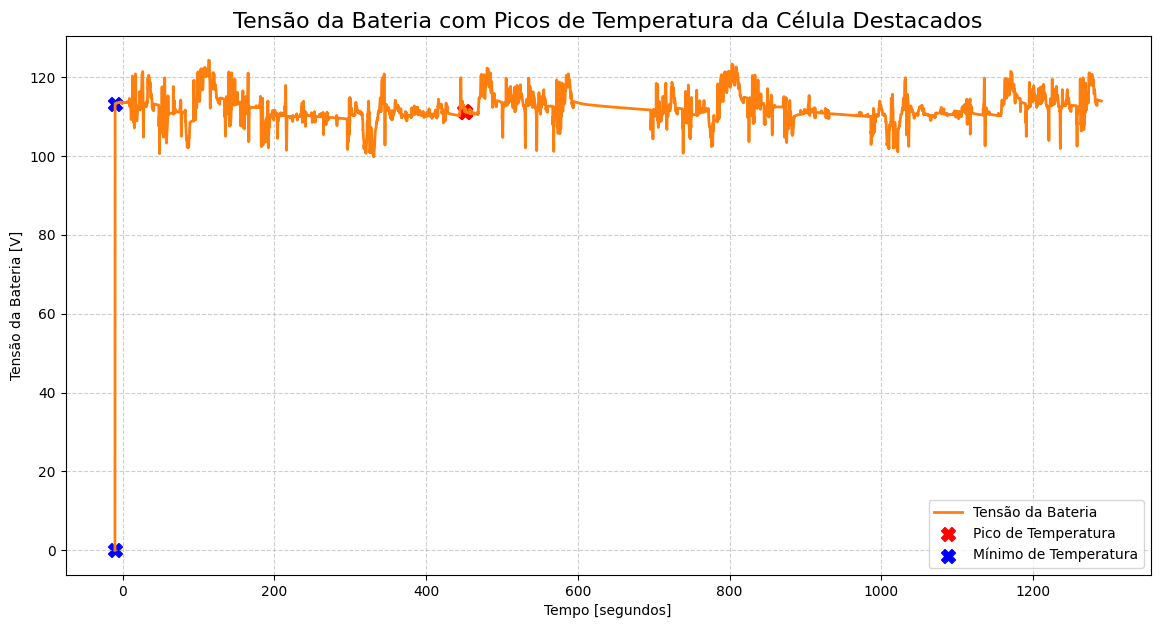

In [52]:
plt.figure(figsize=(14, 7))

# Plot the battery voltage
plt.plot(df['Time[sec]'], df['HV_Battery_Voltage[V]'], label='Tensão da Bateria', color='tab:orange', linewidth=2)

# Find the highest and lowest temperature points
temp_max_threshold = df['Test_Cell_Temp[C]'].max()
temp_min_threshold = df['Test_Cell_Temp[C]'].min()
temp_peaks = df[df['Test_Cell_Temp[C]'] == temp_max_threshold]
temp_valleys = df[df['Test_Cell_Temp[C]'] == temp_min_threshold]

plt.scatter(temp_peaks['Time[sec]'], temp_peaks['HV_Battery_Voltage[V]'],
            color='red', s=100, marker='X', label='Pico de Temperatura')

plt.scatter(temp_valleys['Time[sec]'], temp_valleys['HV_Battery_Voltage[V]'],
            color='blue', s=100, marker='X', label='Mínimo de Temperatura')

plt.title('Tensão da Bateria com Picos de Temperatura da Célula Destacados', fontsize=16)
plt.xlabel('Tempo [segundos]')
plt.ylabel('Tensão da Bateria [V]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

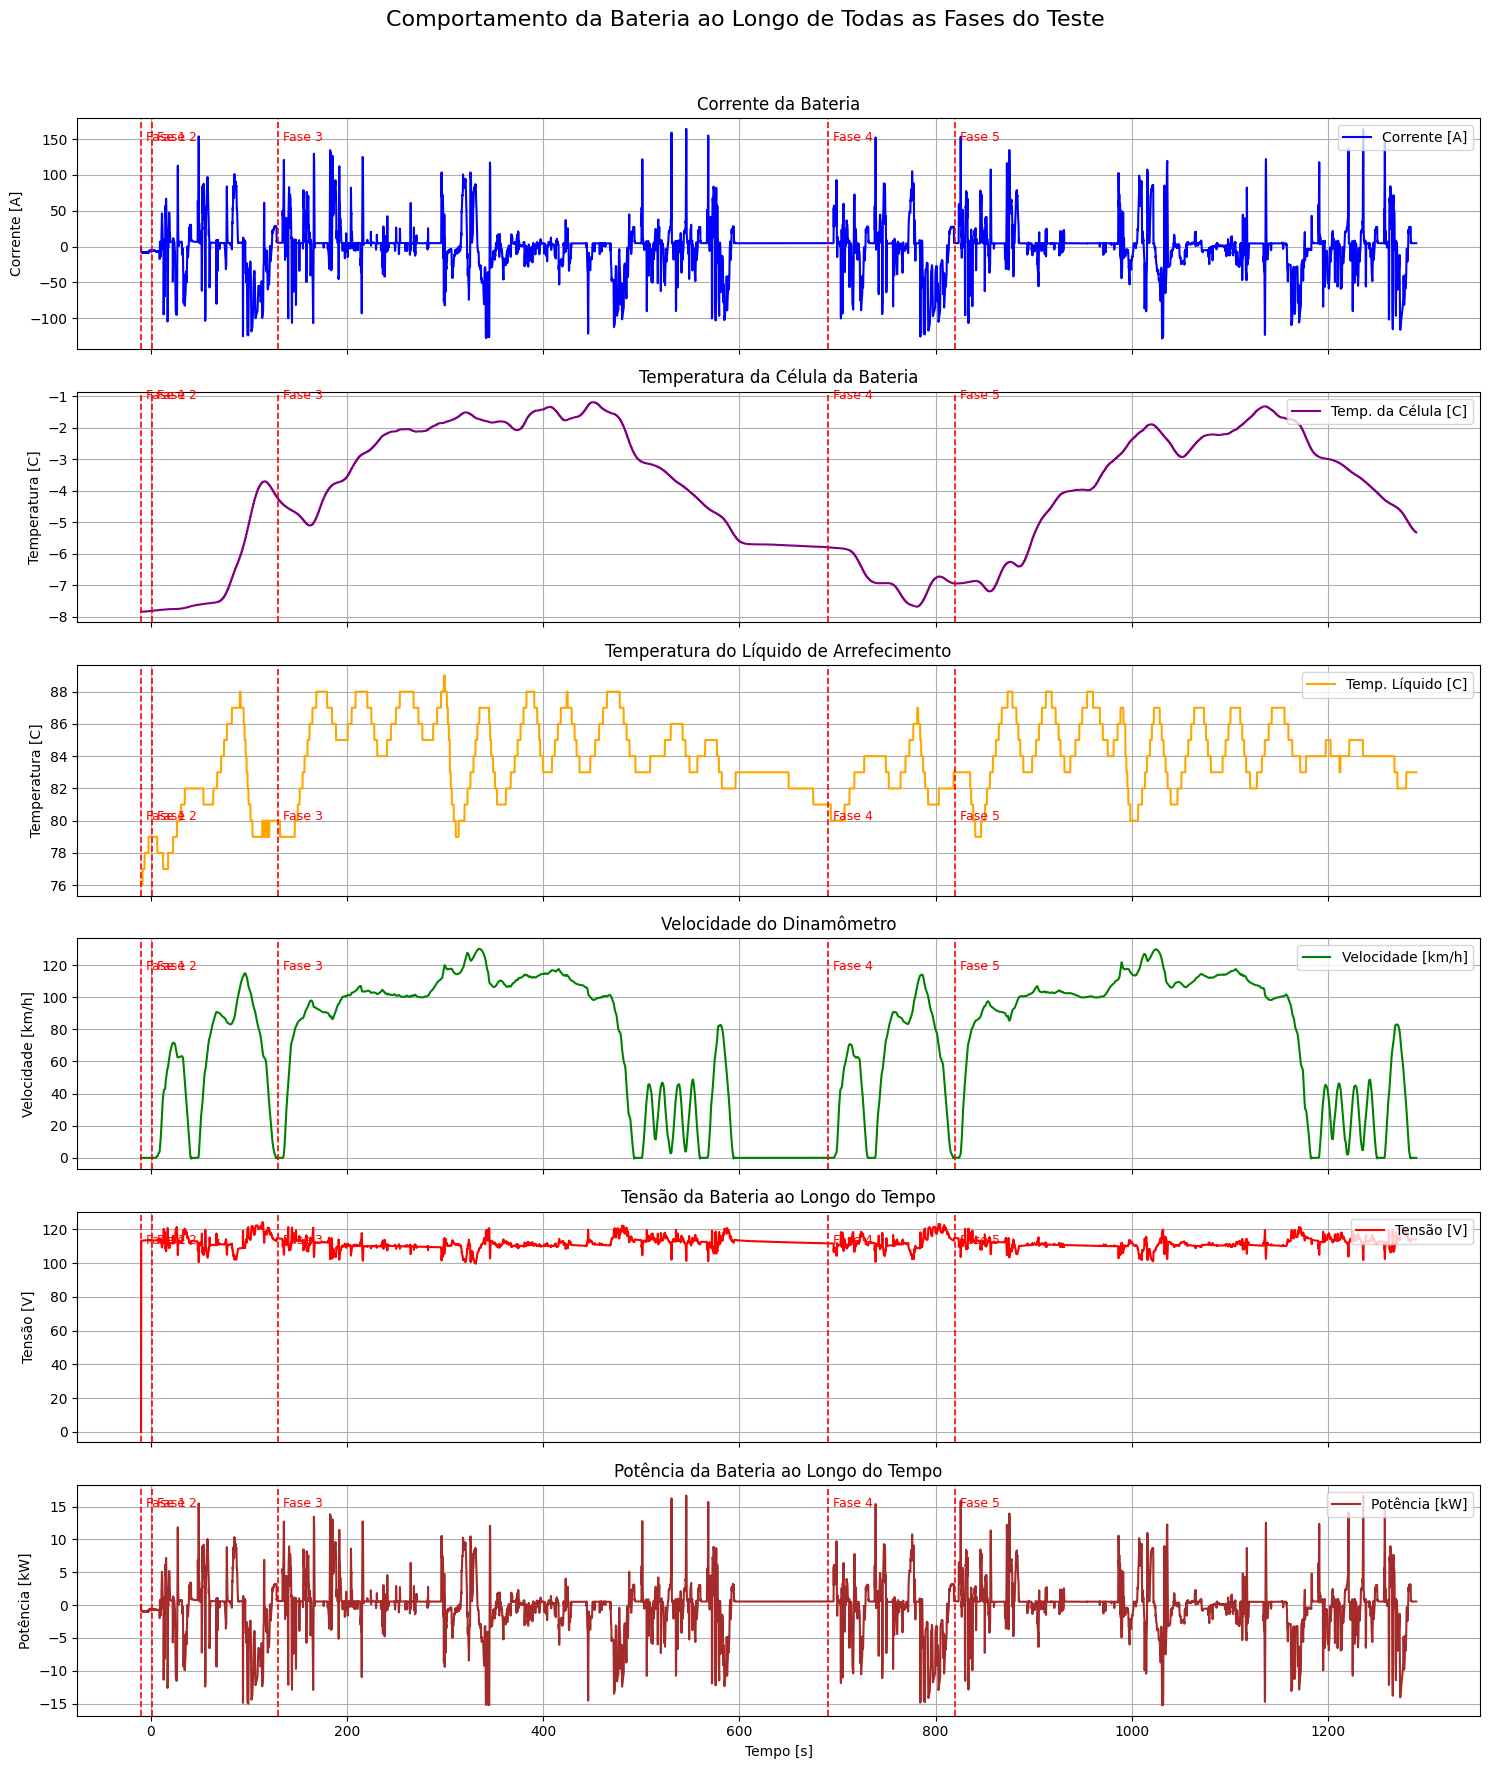

In [60]:
# Encontra os pontos de tempo onde cada nova fase começa
phase_transitions = df.groupby('Phase_#')['Time[sec]'].min()

# Cria a figura e os subplots (6 linhas, 1 coluna)
fig, axs = plt.subplots(6, 1, figsize=(15, 18), sharex=True)
fig.suptitle("Comportamento da Bateria ao Longo de Todas as Fases do Teste", fontsize=16)

# Gráfico 1: Corrente da Bateria
axs[0].plot(df['Time[sec]'], df['HV_Battery_Current[A]'], label='Corrente [A]', color='blue')
axs[0].set_title('Corrente da Bateria')
axs[0].set_ylabel('Corrente [A]')
axs[0].grid(True)
axs[0].legend(loc='upper right')

# Gráfico 2: Temperatura da Célula da Bateria
axs[1].plot(df['Time[sec]'], df['Test_Cell_Temp[C]'], label='Temp. da Célula [C]', color='purple')
axs[1].set_title('Temperatura da Célula da Bateria')
axs[1].set_ylabel('Temperatura [C]')
axs[1].grid(True)
axs[1].legend(loc='upper right')

# Gráfico 3: Temperatura do Líquido de Arrefecimento
axs[2].plot(df['Time[sec]'], df['Engine_Coolant_Temp[C]'], label='Temp. Líquido [C]', color='orange')
axs[2].set_title('Temperatura do Líquido de Arrefecimento')
axs[2].set_ylabel('Temperatura [C]')
axs[2].grid(True)
axs[2].legend(loc='upper right')

# Gráfico 4: Velocidade do Dinamômetro
axs[3].plot(df['Time[sec]'], df['Dyno_Speed[kmh]'], label='Velocidade [km/h]', color='green')
axs[3].set_title('Velocidade do Dinamômetro')
axs[3].set_ylabel('Velocidade [km/h]')
axs[3].grid(True)
axs[3].legend(loc='upper right')

# Gráfico 5: Tensão da Bateria
axs[4].plot(df['Time[sec]'], df['HV_Battery_Voltage[V]'], label='Tensão [V]', color='red')
axs[4].set_title('Tensão da Bateria ao Longo do Tempo')
axs[4].set_ylabel('Tensão [V]')
axs[4].grid(True)
axs[4].legend(loc='upper right')

# Gráfico 6: Potência da Bateria
axs[5].plot(df['Time[sec]'], df['HV_Battery_Power[kW]'], label='Potência [kW]', color='brown')
axs[5].set_title('Potência da Bateria ao Longo do Tempo')
axs[5].set_xlabel('Tempo [s]')
axs[5].set_ylabel('Potência [kW]')
axs[5].grid(True)
axs[5].legend(loc='upper right')

# Adiciona as linhas verticais e anotações em cada subplot
for ax in axs:
    for i, time in enumerate(phase_transitions):
        ax.axvline(time, color='red', linestyle='--', lw=1.2)
        ax.text(time + 5, ax.get_ylim()[1]*0.9, f'Fase {int(i+1)}', 
                rotation=0, verticalalignment='top', fontsize=9, color='red')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
